Part 1: Prompt engineering

In [1]:
!pip install google-generativeai

   ---------------------------------------- 0.0/760.0 kB ? eta -:--:--
   --------------------------------------- 760.0/760.0 kB 31.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 12.6/12.6 MB 65.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/4.4 MB ? eta -:--:--
   ---------------------------------------- 4.4/4.4 MB 65.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.67.0
    Uninstalling grpcio-1.67.0:
      Successfully uninstalled grpcio-1.67.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.17.0 requires flatbuffers>=24.3.25, which is not installed.
tensorflow-intel 2.17.0 requires libclang>=13.0.0, which is not installed.
tensorflow-intel 2.17.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.28.3 which is incompatible.
streamlit 1.32.0 requires packaging<24,>=16.8, but you have packaging 24.1 which is incompatible.
streamlit 1.32.0 requires protobuf<5,>=3.20, but you have protobuf 5.28.3 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#we will be exploring google's python wrapper around their ai API
import os
import google.generativeai as genai

#generate your own key on https://aistudio.google.com/apikey
gemini_api_key = 

genai.configure(api_key=gemini_api_key)
multimodal_model = genai.GenerativeModel("gemini-1.5-flash-002")


In [3]:
#recall that text prompting and image prompting are both supported
model_response = multimodal_model.generate_content("hi, how was your day?")
model_response.text

'As a large language model, I don\'t experience days in the same way humans do. I don\'t have personal feelings or experiences.  However, I\'ve been busy processing information and responding to many user requests.  So, you could say my "day" has been productive!  How was yours?\n'

In [4]:
from PIL import Image

img = Image.open("harrypotter.webp")
model_response = multimodal_model.generate_content(["how many male and female actors are in this image? return as list of two numbers: ", img])
model_response.text

'[2, 1]'

In [5]:
#using your BERT sentiment analysis code from project 3, repeat the process with the uiuc dataset
from transformers import pipeline
#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


In [6]:
import pandas as pd
uiuc=pd.read_csv("uiuc.csv")
sentimentsGEMINI=[]

In [21]:
from collections import Counter
sentiments=[]
i = 0
for text in uiuc["text"]:
  try:
    sentiment = pipe(text)
    sentiments.append(sentiment)
  except:
    print("Error at index:", i)
  i += 1

Token indices sequence length is longer than the specified maximum sequence length for this model (299 > 128). Running this sequence through the model will result in indexing errors


Error at index: 18
Error at index: 44
Error at index: 63
Error at index: 65
Error at index: 67
Error at index: 69
Error at index: 79
Error at index: 141
Error at index: 143
Error at index: 144
Error at index: 157
Error at index: 211
Error at index: 223
Error at index: 238
Error at index: 239
Error at index: 240
Error at index: 241
Error at index: 242
Error at index: 243
Error at index: 265
Error at index: 372
Error at index: 381
Error at index: 416
Error at index: 452
Error at index: 453
Error at index: 461
Error at index: 546
Error at index: 555
Error at index: 560
Error at index: 577
Error at index: 615
Error at index: 710
Error at index: 735
Error at index: 741
Error at index: 756
Error at index: 759
Error at index: 787
Error at index: 809
Error at index: 837
Error at index: 899
Error at index: 920
Error at index: 926
Error at index: 952
Error at index: 961
Error at index: 986
Error at index: 997
Error at index: 1010
Error at index: 1061
Error at index: 1093
Error at index: 1096
Err

In [26]:
# #using the Gemini API, write a prompt to generate sentiment analysis on the same dataset
df_json = uiuc.to_json(orient='records')
model_response = multimodal_model.generate_content(["label each text in the dataset as positive ('POS'), negative ('NEG') or neutral ('NEU') only and output an array of the sentiments", df_json])

In [44]:
#make sure to includein the prompt a limit to the type of results (positive, negative, neutral)
#compare the sentiment percentages, what do you notice? Does one method overestimate or underestimate the sentiment of the dataset?
import re
flat_sentimentsBERT = []
flat_sentimentsGEMINI = []
for sentiment in sentiments:
    flat_sentimentsBERT.append(sentiment[0]['label'])

matches = re.findall(r'\b(NEU|POS|NEG)\b', model_response.text)

flat_sentimentsGEMINI.extend(matches)
# Count the occurrences of each sentiment label
sentiment_countsBERT = Counter(flat_sentimentsBERT)
sentiment_countsGEMINI = Counter(flat_sentimentsGEMINI)

In [51]:
#find a few cases where their judgement differs, what do you think is the reason for the discrepancy? And which answer do you find more convincing?
print("BERT: " + str(sentiment_countsBERT['POS']) + " Gemini: " + str(sentiment_countsGEMINI['POS']))
print("BERT: " + str(sentiment_countsBERT['NEU']) + " Gemini: " + str(sentiment_countsGEMINI['NEU']))
print("BERT: " + str(sentiment_countsBERT['NEG']) + " Gemini: " + str(sentiment_countsGEMINI['NEG']))
#it seems that Gemini was unable to parse through many of the inputs - much less than bert, but seemed to label most things as either positive or neutral and not so much negative
#It seems that Bert is pretty balanced, but Gemini likes neutral and positive a lot
print(flat_sentimentsGEMINI[10] + " ", flat_sentimentsBERT[10])
print(uiuc["text"][10])
print(flat_sentimentsGEMINI[11] + " ", flat_sentimentsBERT[11])
print(uiuc["text"][11])
print(flat_sentimentsGEMINI[13] + " ", flat_sentimentsBERT[13])
print(uiuc["text"][13])
#I think the reason for the discrepancy is that Gemini looks at the meaning of each word rather than the context and BERT does the opposite

BERT: 1052 Gemini: 174
BERT: 2336 Gemini: 610
BERT: 1108 Gemini: 35
NEG  NEU
i dont think there is any cheap used one left
NEG  POS
One advantage of Perplexity over some other GenAIs is that it provides citations with its responses.
POS  NEG
Fed 


(although it's not like they would need to do any undercover work to figure this shit out lol)


Part 2: images

In [8]:
#download 10 images from the internet with a feature you're interested in studying. e.g. gender, race, age, action, etc.

#ask the model to annotate the images with the features you're interested in studying
img = Image.open("Untitled copy 2.jpg")
model_response = multimodal_model.generate_content(["Annotate this image", img])
print(model_response.text)
img = Image.open("Untitled.jpg")
model_response = multimodal_model.generate_content(["Annotate this image", img])
print(model_response.text)
#choose 2 objective (clear right or wrong answer) questions and ask the model to answer them, like how many people are in the image, or what is the color of the object in the image
img = Image.open("Untitled.jpg")
model_response = multimodal_model.generate_content(["How many people are in this image?", img])
print(model_response.text)
img = Image.open("Untitled copy 2.jpg")
model_response = multimodal_model.generate_content(["Which country is the flag in the background?", img])
print(model_response.text)
#choose 2 subjective (open to interpretation) questions and ask the model to answer them, like what is the mood of the person in the image or what race/gender is the person
img = Image.open("Untitled.jpg")
model_response = multimodal_model.generate_content(["What is the general mood of the people in this picture?", img])
print(model_response.text)
img = Image.open("Untitled copy 2.jpg")
model_response = multimodal_model.generate_content(["What do you think is the favorite color of the majority?", img])
print(model_response.text)
#look through the responses. Is there anything you disagree with? What do you think is the reason for the discrepancy? Would you trust large scale results generated for this annotation? 
#I generally agreed with all of the responses the model gave. Even the response it gave for the color made sense since it definitely varies based on your culture and environment. I would trust the large scale results generated for this annotation.

That's a photo of a diverse group of people standing in front of a large American flag.  Here's an annotation:

**Image Description:**

A diverse group of eight adults—men and women of varying ages, ethnicities, and body types—stand shoulder-to-shoulder in a row against a white wall with a large American flag displayed behind them.  They are all smiling at the camera.  Each person except one is holding a small American flag.

* **Diversity:**  The group clearly showcases racial and ethnic diversity, including individuals who appear to be of Caucasian, African American, Middle Eastern, and possibly Hispanic or Latino descent.  There is also variation in age and body size, representing a broader cross-section of the population.

* **Clothing:**  Their attire is casual and contemporary.  The clothing styles are varied, reflecting individual preferences.

* **Setting:**  The setting is simple, with a white wall background and a wooden floor.  The focus is firmly on the people and the flag.

Part 3: Network Demo

In [9]:
!pip install networkx


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import networkx as nx

In [11]:
#new graph
G = nx.Graph()

In [12]:
G.add_node(1)
G.add_nodes_from([2, 3])
#can add additional attributes to the nodes
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])

In [13]:
G.nodes[4]

{'color': 'red'}

In [14]:
list(G.nodes)

[1, 2, 3, 4, 5]

In [15]:
# can manually add edges too
G.add_edge(1, 2)


In [16]:
G.number_of_edges() 

1

In [17]:
#load edges from csv
import pandas as pd

edges = pd.read_csv("got-edges.csv")

G = nx.from_pandas_edgelist(edges, 'Source', 'Target')

In [18]:
G.number_of_edges()

352

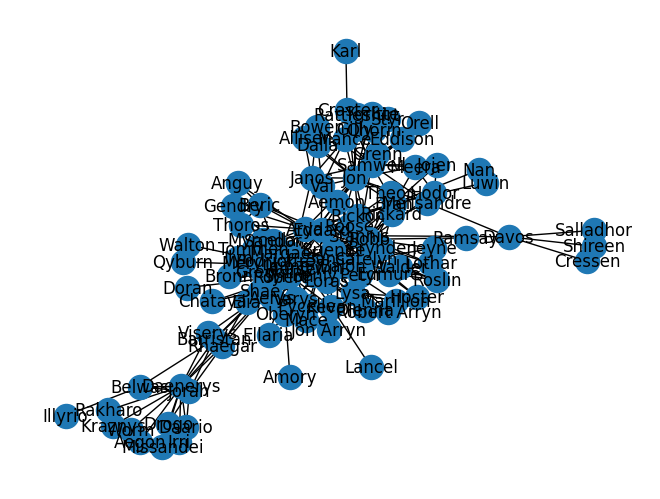

In [19]:
#visualize the graph

import matplotlib.pyplot as plt

nx.draw(G, with_labels=True)

plt.show()




In [20]:
#calculate the density of the graph

nx.density(G)


0.062070181625815554

In [21]:
#return highest degree nodes

sorted(G.degree, key=lambda x: x[1], reverse=True)

[('Tyrion', 36),
 ('Jon', 26),
 ('Sansa', 26),
 ('Robb', 25),
 ('Jaime', 24),
 ('Tywin', 22),
 ('Cersei', 20),
 ('Arya', 19),
 ('Robert', 18),
 ('Joffrey', 18),
 ('Catelyn', 18),
 ('Samwell', 15),
 ('Bran', 14),
 ('Stannis', 14),
 ('Daenerys', 14),
 ('Sandor', 13),
 ('Mance', 12),
 ('Gregor', 12),
 ('Eddard', 12),
 ('Lysa', 10),
 ('Loras', 9),
 ('Brynden', 8),
 ('Walder', 8),
 ('Edmure', 8),
 ('Renly', 8),
 ('Oberyn', 7),
 ('Brienne', 7),
 ('Petyr', 7),
 ('Meryn', 7),
 ('Varys', 7),
 ('Margaery', 7),
 ('Beric', 6),
 ('Rickon', 6),
 ('Balon', 6),
 ('Barristan', 6),
 ('Ilyn', 6),
 ('Jorah', 6),
 ('Rhaegar', 6),
 ('Janos', 6),
 ('Kevan', 6),
 ('Aemon', 5),
 ('Thoros', 5),
 ('Meera', 5),
 ('Podrick', 5),
 ('Lothar', 5),
 ('Elia', 5),
 ('Shae', 5),
 ('Craster', 5),
 ('Davos', 5),
 ('Tommen', 5),
 ('Qhorin', 5),
 ('Grenn', 4),
 ('Aerys', 4),
 ('Gendry', 4),
 ('Roose', 4),
 ('Belwas', 4),
 ('Hodor', 4),
 ('Jojen', 4),
 ('Theon', 4),
 ('Bronn', 4),
 ('Roslin', 4),
 ('Pycelle', 4),
 ('Daario', 

In [22]:

#make dataframes with nodes and a column for each centrality measure
df=pd.DataFrame(list(nx.degree_centrality(G).items()), columns=['node', 'degree'])
#add column for betweeness centrality
df['betweenness'] = list(nx.betweenness_centrality(G).values())
#add column for closeness centrality
df['closeness'] = list(nx.closeness_centrality(G).values())
#add column for eigenvector centrality
df['eigenvector'] = list(nx.eigenvector_centrality(G).values())





3a. explore this dataframe, are there huge differences between these types of centrality? What might cause this?

In [23]:
df

,node,degree,betweenness,closeness,eigenvector
0,Aemon,0.047170,0.004623,0.389706,0.044139
1,Grenn,0.037736,0.000060,0.330218,0.019480
2,Samwell,0.141509,0.032273,0.384058,0.054346
3,Aerys,0.037736,0.000000,0.392593,0.078330
4,Jaime,0.226415,0.099943,0.479638,0.273663
...,...,...,...,...,...
102,Ramsay,0.009434,0.000000,0.329193,0.018535
103,Chataya,0.018868,0.000000,0.340836,0.031102
104,Shireen,0.009434,0.000000,0.250000,0.001142
105,Doran,0.009434,0.000000,0.339744,0.025483


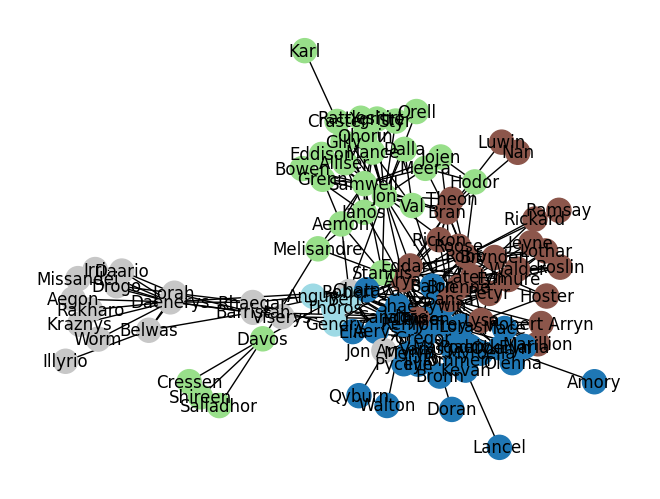

In [24]:
#calculate community structure
import networkx.algorithms.community as nxcom
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

#add community to node features

for i, community in enumerate(communities):
    for node in community:
        df.loc[df.node == node, "community"] = i

#color nodes by community
colors = df.community / df.community.max()

nx.draw(G, with_labels=True, node_color=colors, cmap=plt.cm.tab20)

plt.show()


Part 4: make your own social network. Take either a short excerpt of a novel, tv show, movie, or real life social network you are familiar with. Make a csv modelled off of the got-edges.csv with a Source, Target, and weight column. You need to decide what constitutes an edge and node, but easiest is characters or people connected by their number of interactions. You should manually type this into the csv. Include at least 25 edges

What kind of potential issues did you run into while converting it into a graph? Any ambiguities that made it difficult to decide? 

use either Gephi or NetworkX to calculate node centrality and community features and add a visualization of the graph here. Does it align with your understanding of the media? 

In [61]:
import pandas as pd
import random as random

df = pd.DataFrame(data)
df.to_csv('social_network.csv', index=False)

df = pd.DataFrame(data)
df.to_csv('social_network.csv', index=False)

In [62]:
edges = pd.read_csv("social_network.csv")
G = nx.from_pandas_edgelist(edges, 'Source', 'Target')

In [63]:

#make dataframes with nodes and a column for each centrality measure
df=pd.DataFrame(list(nx.degree_centrality(G).items()), columns=['node', 'degree'])
#add column for betweeness centrality
df['betweenness'] = list(nx.betweenness_centrality(G).values())
#add column for closeness centrality
df['closeness'] = list(nx.closeness_centrality(G).values())
#add column for eigenvector centrality
df['eigenvector'] = list(nx.eigenvector_centrality(G).values())





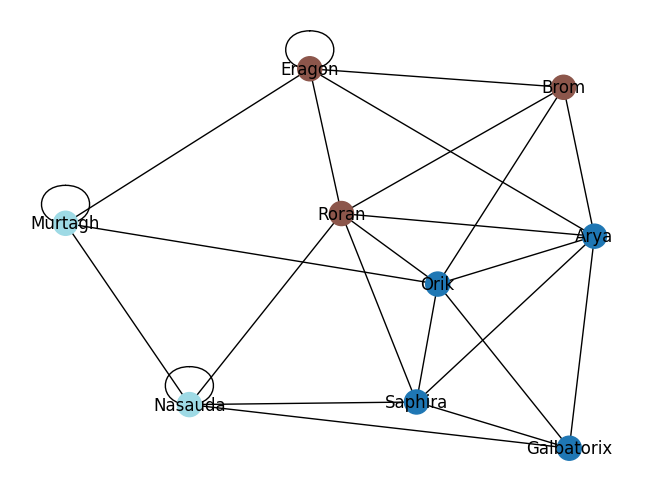

In [64]:
#calculate community structure
import networkx.algorithms.community as nxcom
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

#add community to node features

for i, community in enumerate(communities):
    for node in community:
        df.loc[df.node == node, "community"] = i

#color nodes by community
colors = df.community / df.community.max()

nx.draw(G, with_labels=True, node_color=colors, cmap=plt.cm.tab20)

plt.show()


In [65]:
#There weren't really many issues or ambiguities since I copy and pasted the code from the demo
#This more or less corresponds to my understanding of the media since the self loops represent when the reader sees from the perspective of the character and everyone is pretty interconnected within this book